In [ ]:
'''
This is the legendary Titanic ML competition – 
the best, first challenge for you to dive into ML competitions
and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model
that predicts which passengers survived the Titanic shipwreck.
'''

In [ ]:
'''
    You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.
    The file should have exactly 2 columns:
    PassengerId (sorted in any order)
    Survived (contains your binary predictions: 1 for survived, 0 for deceased)
'''

In [ ]:
'''
    In this tutorial i am going to show how to implement Deep Neural Networks 
    in keras and also we will have a look on simple feature engineering to be
    able to classify the dataset efficiently.
'''

In [1]:
import numpy as np   # Linear Algebra
import pandas as pd  # Data Processing, CSV FILE I/O (pd.read_csv)
import os
import pandas as pd

In [2]:
training = pd.read_csv("./train.csv")
testing = pd.read_csv("./test.csv")

In [7]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

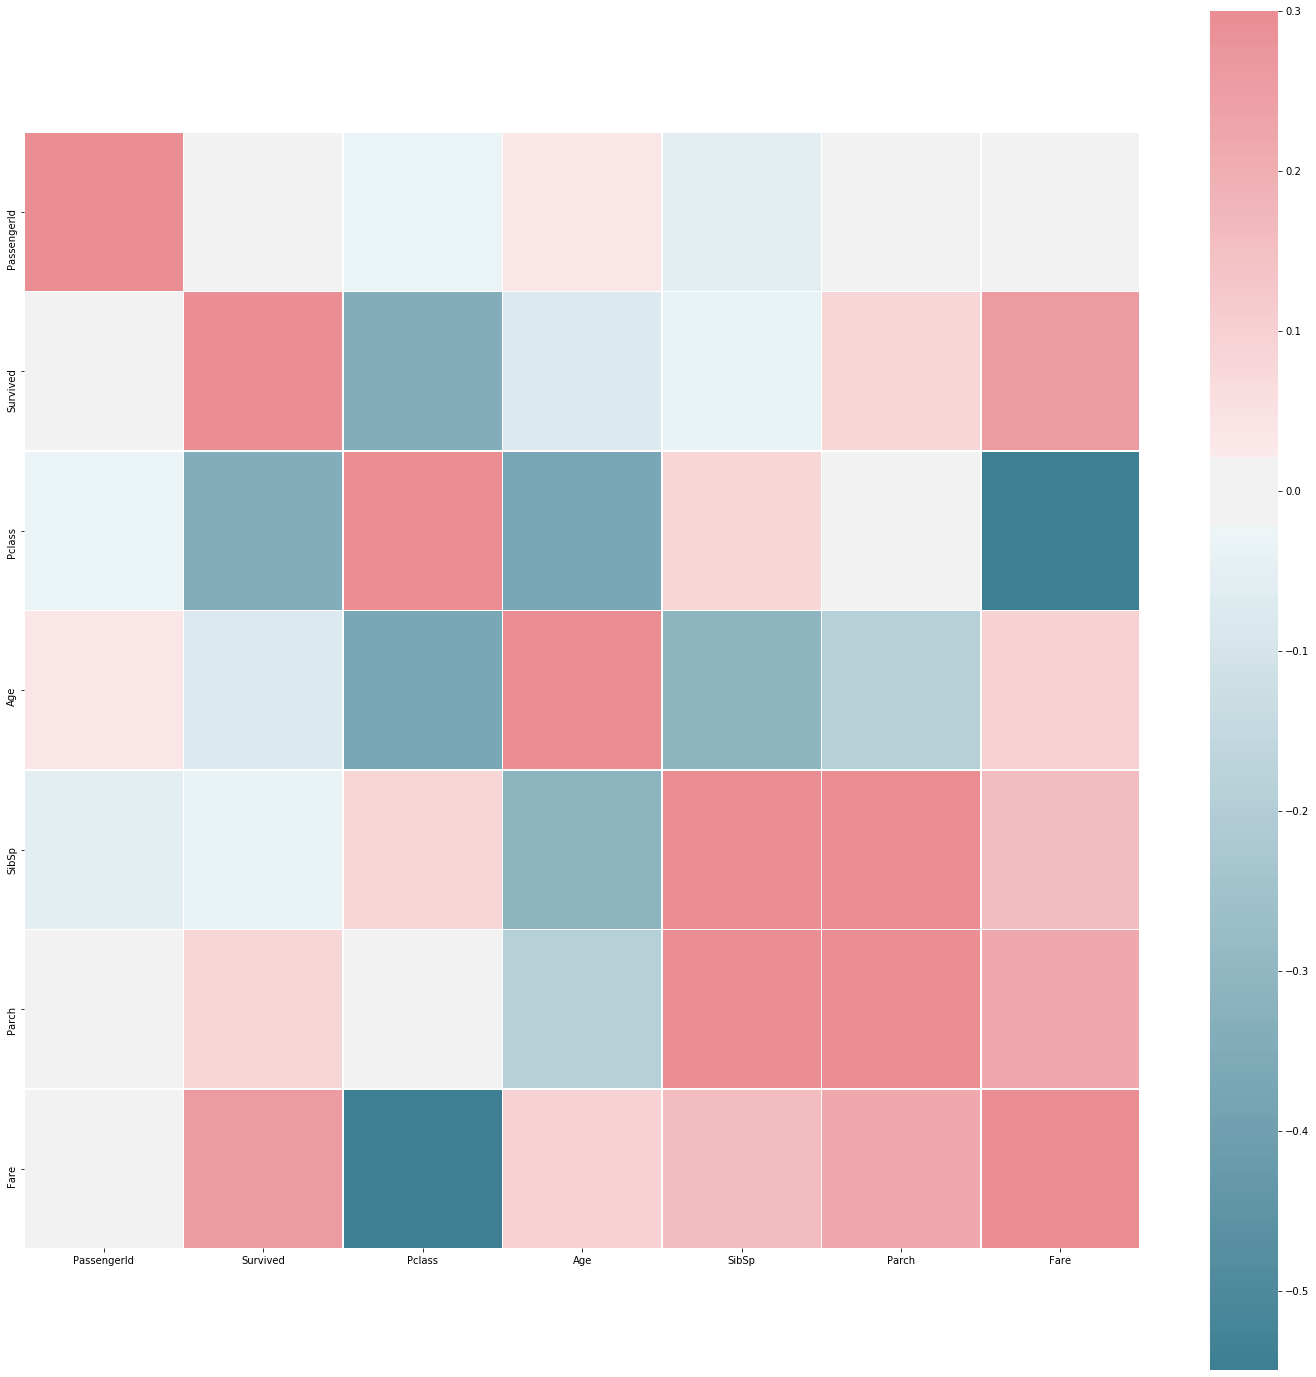

In [15]:
corr = training.corr()
f,ax = plt.subplots(figsize=(25,25))
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, 
            square=True, linewidths =.5)

In [19]:
print("Number of training examples (data points) = %i" % training.shape[0])
print("The number of features we have = %i " % training.shape[1])

Number of training examples (data points) = 891
The number of features we have = 12 


In [20]:
unique, count = np.unique(training["Survived"], return_counts=True)
print("The number of occurances of each class in the dataset = %s " %dict(zip(unique,count)), "\n")

The number of occurances of each class in the dataset = {0: 549, 1: 342}  



In [21]:
training.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
C = training.Cabin[training.Cabin.isna()]
C_not = training.Cabin[training.Cabin.notna()]
C.values[:] = 0 
C_not.values[:] = 1

In [27]:
cabine_not = pd.concat([C, C_not]).sort_index()

In [28]:
np.random.seed(0)

In [ ]:
# Embarked = pd.get_dummies(training.Embarked, prefix='Embarked')
# training = pd.concat([training, Embarked], axis=1, sort=False)

In [30]:
training['sp'] = training.SibSp + training['Parch']
training['cabine_n'] = cabine_not
training.drop([ "Name" ,"Embarked", "PassengerId","Ticket","Cabin"], inplace = True, axis = 1 )

In [31]:
mean = training.mean().astype(np.int32)
training.fillna( mean , inplace = True)
x_train = training
repCol3 = {"male": 0, "female": 1}
repCol8 = {"C":9, "Q":1, "S":2}
repCol9 = {1:3, 2:2, 3:1}
x_train['IsAlone'] = 1
x_train['IsAlone'].loc[x_train['sp'] > 0] = 0
x_train.replace({"Sex": repCol3, 'Pclass': repCol9} , inplace = True )
print( x_train.shape )
x_train.head()

(891, 10)


/Users/sharadkochhar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,sp,cabine_n,IsAlone
0,0,1,0,22.0,1,0,7.2500,1,0,0
1,1,3,1,38.0,1,0,71.2833,1,1,0
2,1,1,1,26.0,0,0,7.9250,0,0,1
3,1,3,1,35.0,1,0,53.1000,1,1,0
4,0,1,0,35.0,0,0,8.0500,0,0,1


In [32]:
x_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,sp,cabine_n,IsAlone
0,0,1,0,22.0,1,0,7.2500,1,0,0
1,1,3,1,38.0,1,0,71.2833,1,1,0
2,1,1,1,26.0,0,0,7.9250,0,0,1
3,1,3,1,35.0,1,0,53.1000,1,1,0
4,0,1,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0,1
887,1,3,1,19.0,0,0,30.0000,0,1,1
888,0,1,1,29.0,1,2,23.4500,3,0,0
889,1,3,0,26.0,0,0,30.0000,0,1,1


In [33]:
x_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,sp,cabine_n,IsAlone
0,0,1,0,22.0,1,0,7.2500,1,0,0
1,1,3,1,38.0,1,0,71.2833,1,1,0
2,1,1,1,26.0,0,0,7.9250,0,0,1
3,1,3,1,35.0,1,0,53.1000,1,1,0
4,0,1,0,35.0,0,0,8.0500,0,0,1


In [34]:
x_train.cabine_n = x_train.cabine_n.astype(int)

In [35]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   sp        891 non-null    int64  
 8   cabine_n  891 non-null    int64  
 9   IsAlone   891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [36]:
y_train = x_train["Survived"]
x_train = x_train.drop(['Survived'], axis = 1)

print(y_train.shape )
y_train.head(20)

(891,)


0     0
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    1
16    0
17    1
18    0
19    1
Name: Survived, dtype: int64

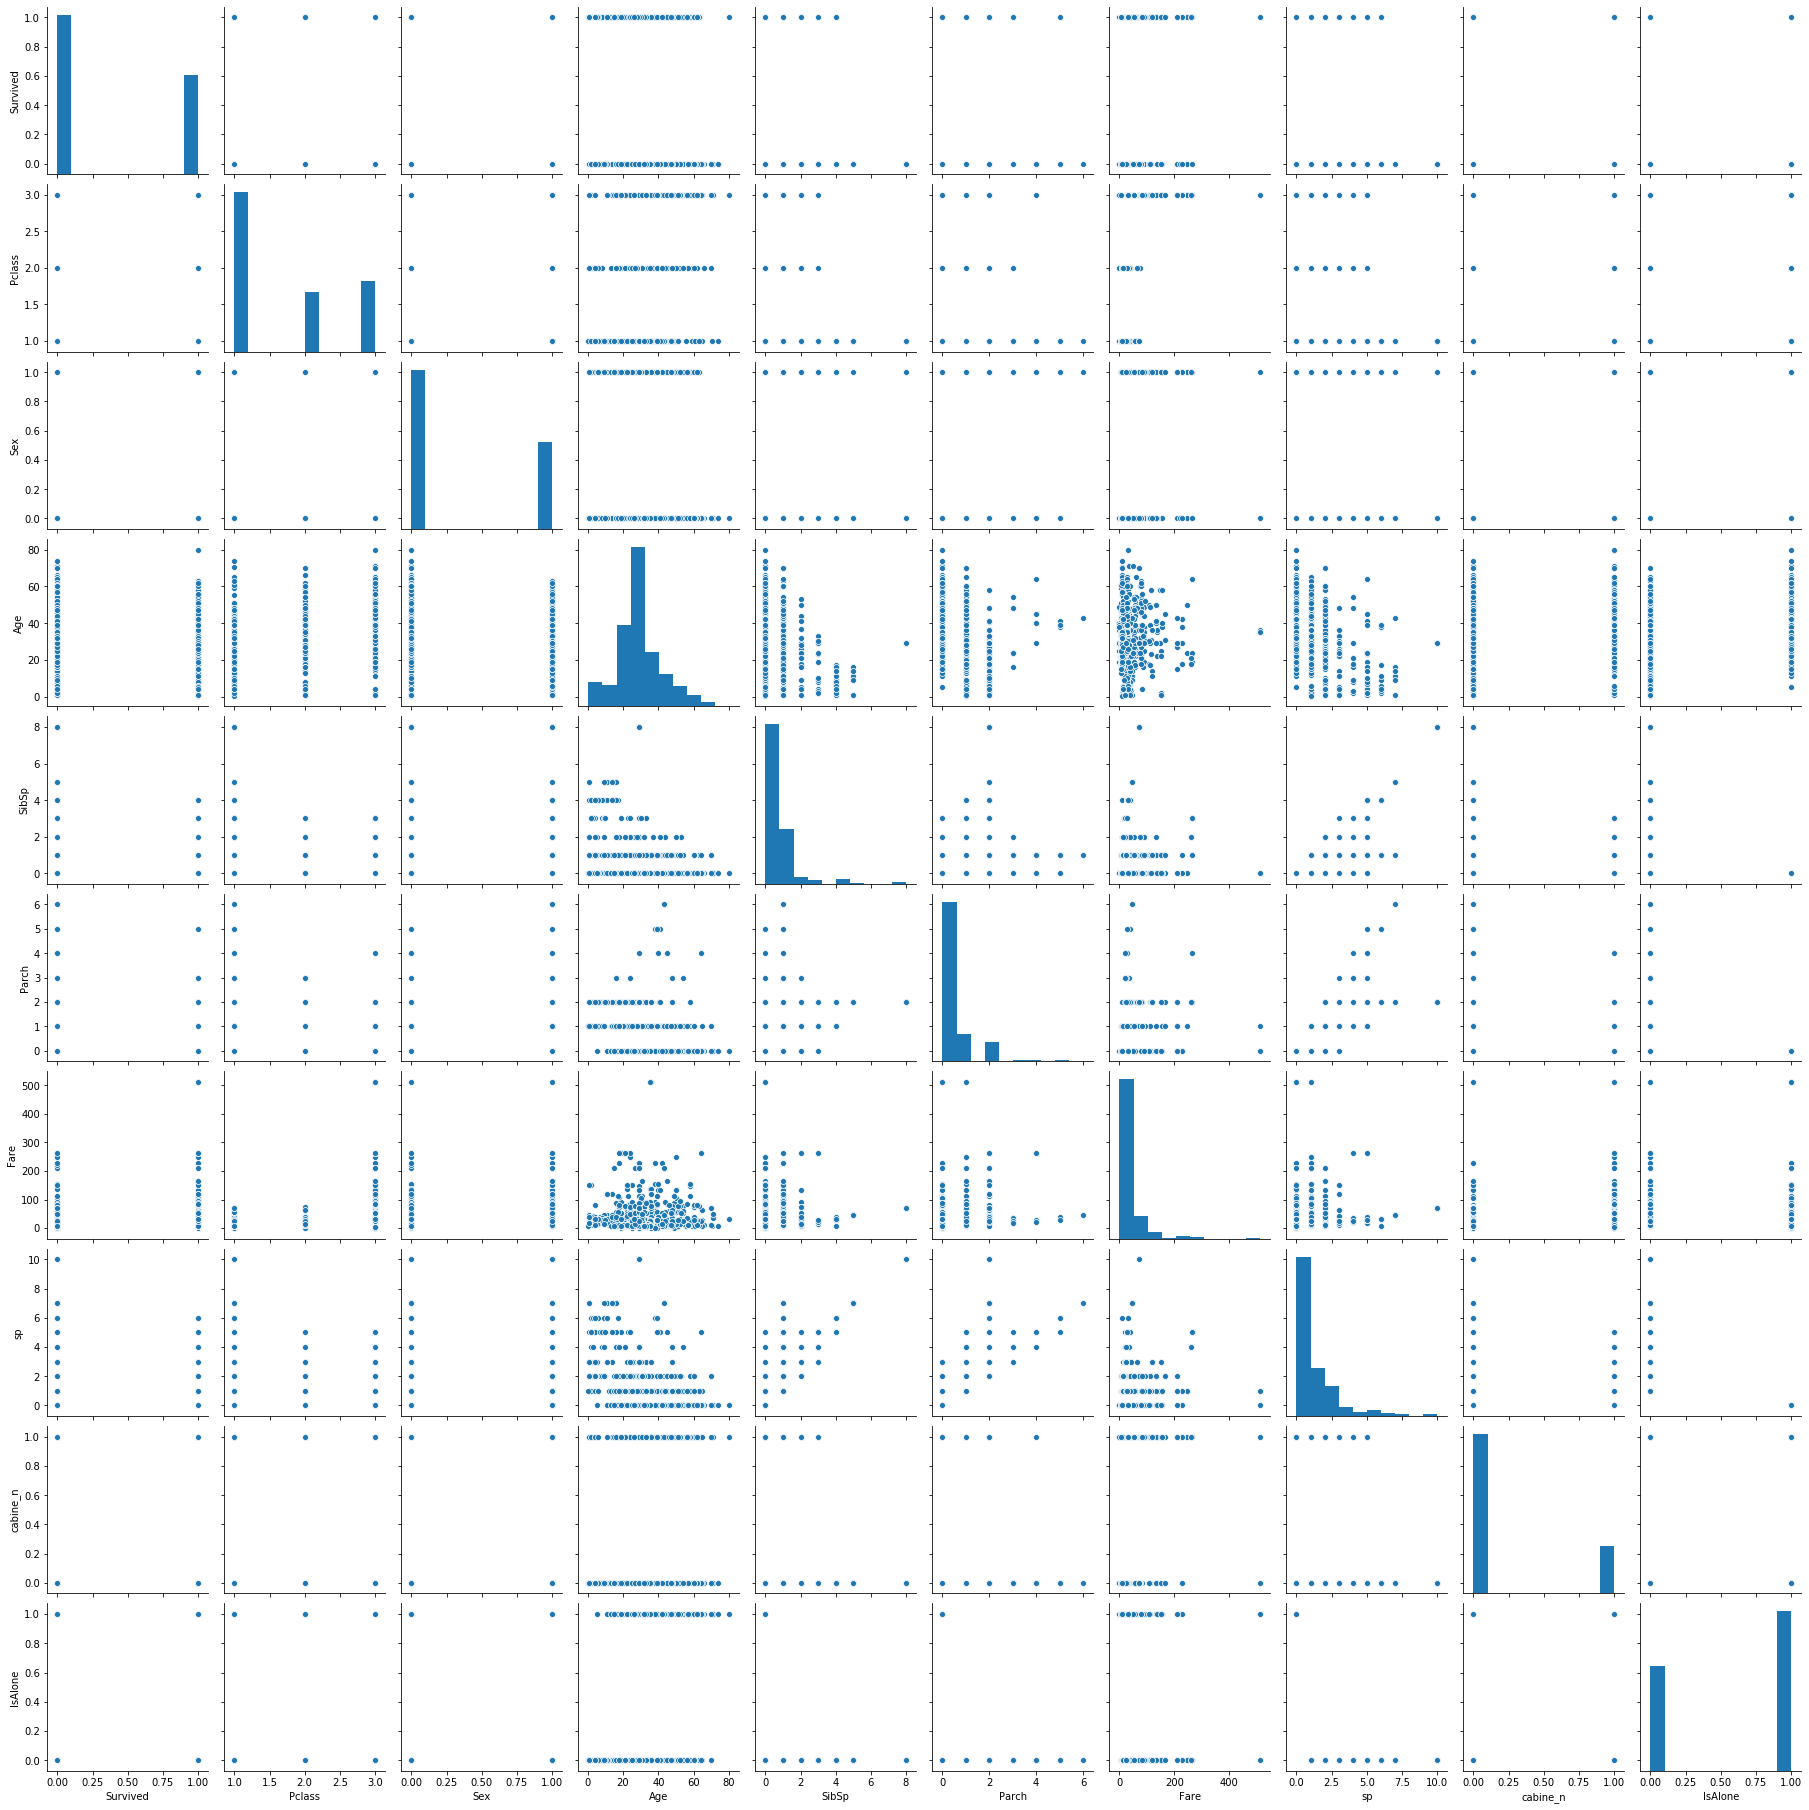

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(training)

In [ ]:
'''
  Since i dropped some features from the training set I have to drop
  the same featurres from the test set and do the same steps of feature eng.
'''

In [43]:
C = x_test.Cabin[x_test.Cabin.isna()]
C_not = x_test.Cabin[x_test.Cabin.notna()]
C.values[:] = 0
C_not.values[:] = 1

x_test['sp'] = x_test.SibSp + x_test['Parch']
x_test['cabine_n'] = cabine_not
x_test.cabine_n = x_test.cabine_n.astype(int)

x_test.drop(["Name","Embarked", "Ticket","Cabin" ],inplace = True,axis = 1)
x_test.replace({"Sex": repCol3, 'Pclass': repCol9},inplace = True )
x_test.head()

NameError: name 'x_test' is not defined

In [ ]:
'''
    Now it is time to design the ML Pipeline.
    I will use Deep Neural Networks in Keras to classify the dataset. 
    The number of layers i am using is optmized using some error analys of the results.
    I will use early stopping to stop if the error is not decreasing.
'''

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import callbacks
from keras import optimizers
from keras.layers import BatchNormalization

In [7]:
model = Sequential()
model.add(Dense(25,input_dim=InputDimension, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))

In [8]:
model.add(Dense(2, activation='softmax'))

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

NameError: name 'history' is not defined

In [11]:
id = x_test['PassengerId']
x_test.drop(['PassengerId'], inplace = True, axis = 1)
x_test['IsAlone'] = 1
x_test['IsAlone'].loc[x_test['sp'] > 0] = 0
x_test.fillna( x_test.mean() ,inplace = True)

NameError: name 'x_test' is not defined

In [12]:
id.reset_index(drop=True, inplace=True)
out = pd.DataFrame({'PassengerId': id, "Survived": predictions})
out.to_csv('titanic-predictions.csv', index = False)
out.head(100)

AttributeError: 'builtin_function_or_method' object has no attribute 'reset_index'

In [1]:
pwd


'/Users/sharadkochhar'